# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2022-11-08 21:15:11.582077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/12
469/469 [==============================] - 74s 157ms/step - loss: 2.2749 - accuracy: 0.1533 - val_loss: 2.2361 - val_accuracy: 0.3312
Epoch 2/12
469/469 [==============================] - 66s 140ms/step - loss: 2.2137 - accuracy: 0.2632 - val_loss: 2.1598 - val_accuracy: 0.5181
Epoch 3/12
469/469 [==============================] - 67s 144ms/step - loss: 2.1348 - accuracy: 0.3645 - val_loss: 2.0606 - val_accuracy: 0.6120
Epoch 4/12
469/469 [==============================] - 67s 143ms/step - loss: 2.0319 - accuracy: 0.4475 - val_loss: 1.9290 - val_accuracy: 0.6916
Epoch 5/12
469/469 [==============================] - 68s 144ms/step - loss: 1.8981 - accuracy: 0.5166 - val_loss: 1.7609 - val_accuracy: 0.7382
Epoch 6/12
469/469 [==============================] - 69s 146ms/step - loss: 1.7384 - accuracy: 0.5669 - val_loss: 1.5613 - val_accuracy: 0.7687
Epoch 7/12
469/469 [==============================] - 69s 146ms/step - loss: 1.5604 - accuracy: 0.6064 - val_loss: 1.3528 - val_ac

## Comparing Original Data with Noisey Data

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Adding Noise
x_train = np.random.normal(x_train, scale = .5)
x_test = np.random.normal(x_test, scale = .5)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history_noise = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score_noise = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 110s 234ms/step - loss: 2.3160 - accuracy: 0.0993 - val_loss: 2.2906 - val_accuracy: 0.1454
Epoch 2/12
469/469 [==============================] - 92s 196ms/step - loss: 2.2921 - accuracy: 0.1261 - val_loss: 2.2690 - val_accuracy: 0.2460
Epoch 3/12
469/469 [==============================] - 97s 207ms/step - loss: 2.2713 - accuracy: 0.1537 - val_loss: 2.2445 - val_accuracy: 0.3478
Epoch 4/12
469/469 [==============================] - 107s 228ms/step - loss: 2.2501 - accuracy: 0.1877 - val_loss: 2.2151 - val_accuracy: 0.4285
Epoch 5/12
469/469 [==============================] - 87s 186ms/step - loss: 2.2219 - accuracy: 0.2162 - val_loss: 2.1797 - val_accuracy: 0.4914
Epoch 6/12
469/469 [==============================] - 97s 208ms/step - loss: 2.1911 - accuracy: 0.2495 - val_loss: 2.1388 - val_accuracy: 0.5418
Epoch 7/12
469/469 [==============================] - 120s 256ms/step - loss: 2.1527 - accuracy: 0.2815 - val_loss: 2.0907 - val

Text(0.5, 1.0, 'Validation Accuracy Value vs Epoch by Dataset')

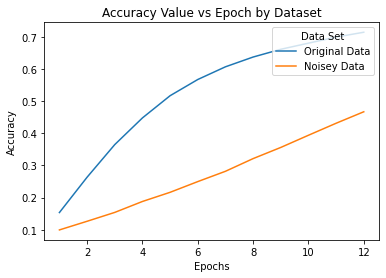

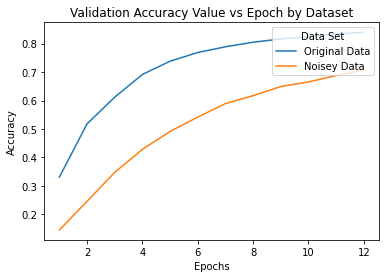

In [10]:
epoch_num = list(range(1, len(history.history["accuracy"])+1))

# plot scores
plot = plt.figure()

plt.plot(epoch_num, history.history["accuracy"], label = "Original Data")
plt.plot(epoch_num, history_noise.history["accuracy"], label = "Noisey Data")

plt.legend(title = "Data Set", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Value vs Epoch by Dataset")

plot_test = plt.figure()

plt.plot(epoch_num, history.history["val_accuracy"], label = "Original Data")
plt.plot(epoch_num, history_noise.history["val_accuracy"], label = "Noisey Data")

plt.legend(title = "Data Set", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Value vs Epoch by Dataset")


## Comparing Different Noise Scale Values 

Epoch 1/12
469/469 [==============================] - 121s 256ms/step - loss: 2.2653 - accuracy: 0.1631 - val_loss: 2.2169 - val_accuracy: 0.3550
Epoch 2/12
469/469 [==============================] - 96s 205ms/step - loss: 2.1939 - accuracy: 0.2641 - val_loss: 2.1299 - val_accuracy: 0.5259
Epoch 3/12
469/469 [==============================] - 71s 152ms/step - loss: 2.1057 - accuracy: 0.3553 - val_loss: 2.0166 - val_accuracy: 0.6500
Epoch 4/12
469/469 [==============================] - 85s 181ms/step - loss: 1.9905 - accuracy: 0.4429 - val_loss: 1.8674 - val_accuracy: 0.7097
Epoch 5/12
469/469 [==============================] - 74s 158ms/step - loss: 1.8461 - accuracy: 0.5108 - val_loss: 1.6886 - val_accuracy: 0.7390
Epoch 6/12
469/469 [==============================] - 75s 159ms/step - loss: 1.6860 - accuracy: 0.5607 - val_loss: 1.4942 - val_accuracy: 0.7623
Epoch 7/12
469/469 [==============================] - 72s 153ms/step - loss: 1.5259 - accuracy: 0.5953 - val_loss: 1.3041 - val_a

Text(0.5, 1.0, 'Validation Accuracy Value vs Epoch by Noise Scale Value')

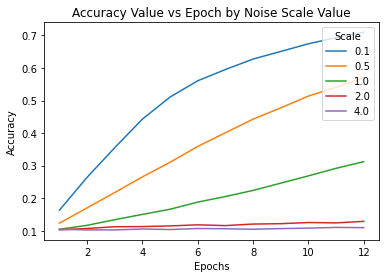

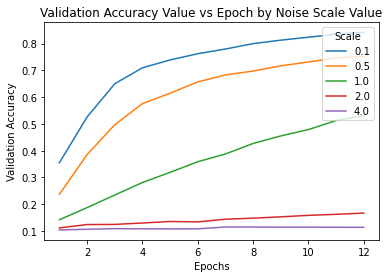

In [14]:
# input image dimensions
img_rows, img_cols = 28, 28
scales = [.1, .5, 1.0, 2.0, 4.0]
scores = []
scores_test = []
scale_nums = []

for n in scales:
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
   
    if backend.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    # Adding Noise
    x_train = np.random.normal(x_train, scale = n)
    x_test = np.random.normal(x_test, scale = n)
    
    batch_size = 128
    num_classes = 10
    epochs = 12
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    
    history_test = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    
    # evaluate the model
    accuracy = history_test.history["accuracy"]
    accuracy_test = history_test.history["val_accuracy"]
    scores.append(accuracy)
    scores_test.append(accuracy_test)
    scale_num = n
    scale_nums.append(scale_num)
    epoch_num = list(range(1, len(scores[0])+1))

# plot scores
plot = plt.figure()

for i in range(len(scores)):
    plt.plot(epoch_num, scores[i], label = scale_nums[i])
plt.legend(title = "Scale", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Value vs Epoch by Noise Scale Value")

plot_test = plt.figure()

for k in range(len(scores_test)):
    plt.plot(epoch_num, scores_test[k], label = scale_nums[k])
plt.legend(title = "Scale", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Value vs Epoch by Noise Scale Value")

## Comparing This Week's Results with Last Week's

Last week's Multi Layer Neural network was a more effective model than the Convolutional Network model created this week. First, the Multi Layer model quickly had accuracy values over .90 for both the original dataset and the dataset with additional noise. The Convolutional Network never topped .80 accuracy, even after completing 12 epochs. Similarly, when the models were faced with a series of different noise levels the Multi Layer Network model outperformed the Convolutional Network model. For example, the Multi Layer model reached nearly 1.0 accuracy at the lowest noise level while the Convolutional model failed topped out at a value of roughly .8. The Multi Layer Network had higher accuracy at all noise levels as well.